## Seismic wavefield visualization and comparison
### D. Li
### 7 Feb. 2024


In [64]:
# load modulus
import numpy as np
import seissolxdmf
import pandas as pd
import scipy.spatial as spatial
import matplotlib.pyplot as plt

In [83]:
# load seissol out put data and extract station
# load GM data and compare station-to-station


def find_surf_site(stafolder, stafile, xdmfFilename,modelname):
    
    staFile = open(stafolder  + stafile ,'r')
    
    sx = seissolxdmf.seissolxdmf(xdmfFilename)
    # Number of cells
    nElements = sx.ReadNElements()
    # Read time step
    dt = sx.ReadTimeStep()
    # Read number of time steps
    ndt = sx.ReadNdt()
    # load geometry array as a numpy array of shape ((nodes, 3))
    surfxyz= sx.ReadGeometry()
    # load connectivity array as a numpy array of shape ((nElements, 3 or 4))
    # The connectivity array gives for each cell a list of vertex ids.
    connect = sx.ReadConnect()
    # horizontal comp. and vertical
    u = sx.ReadData('v1')
    v = sx.ReadData('v2')
    w = sx.ReadData('v3')
    print('(ndt,nelemenet)= ', u.shape)
    print('time interval=', dt)
    
    sitexyz = np.loadtxt(staFile)
    # coordinates convert if necessary
    # staxyz = pyproj.transform(myproj,lla,gmData.long,gmData.lat,radians=False)

    centers = (surfxyz[connect[:,0]] + surfxyz[connect[:,1]] + surfxyz[connect[:,2]])/3.
    Receiver = np.array(sitexyz)
    
    # Receiver = Receiver.transpose()
    
    # search for nearest points of stations
    tree = spatial.KDTree(centers)
    dist, ids = tree.query(Receiver)
    
    FidReceiversnew =  stafolder + modelname + '/'+ 'sitemesh_xyz.txt'
    fout = open(FidReceiversnew,'w')
    fout1 = open(stafolder + modelname + '/'+'sitemesh_number.txt','w')
    
    for k in range(sitexyz[:,0].size):
        #newrec = find_nearest_vector(centers, rec)
        newrec = centers[ids[k]]
        print(k,ids[k])
        fout.write("%f %f %f\n" %(newrec[0],newrec[1],newrec[2]))
        fout1.write("%d %f\n" %(ids[k],dist[k]))

        data = np.array([u[:,ids[k]],v[:,ids[k]],w[:,ids[k]]])
        np.savetxt(stafolder + modelname + '/sta'+ str(k)+'.txt',data.transpose())
        
    fout.close()
    fout1.close()

In [47]:
# extract station output
# seissolxdmf.seissolxdmf.ReadData?

# sx = seissolxdmf.seissolxdmf(xdmfFilename)
# # Number of cells
# nElements = sx.ReadNElements()
# # Read time step
# dt = sx.ReadTimeStep()
# # Read number of time steps
# ndt = sx.ReadNdt()
# # load geometry array as a numpy array of shape ((nodes, 3))
# surfxyz= sx.ReadGeometry()
# # load connectivity array as a numpy array of shape ((nElements, 3 or 4))
# # The connectivity array gives for each cell a list of vertex ids.
# connect = sx.ReadConnect()
# # horizontal comp. and vertical
# u = sx.ReadData('v1')
# v = sx.ReadData('v2')
# w = sx.ReadData('v3')
# print(u.shape)

# data = np.array([u[:,4],v[:,4],w[:,4]])
# print(data.shape,data.transpose().shape)

(3, 80) (80, 3)


In [ ]:
# load surface data and check station

xdmffolder = '/Volumes/AvalonPark/test3dv4_5hz/'
modelname = 'test3Dv4-5hz'

# xdmffolder = '/Volumes/AvalonPark/output/'
# modelname = 'test3Dv2-2hz'

xdmffolder = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/pointsource/'
modelname = 'test2'

xdmfFilename = xdmffolder + modelname+'-surface.xdmf'

stafolder = '/Users/duoli/Library/Mobile Documents/com~apple~CloudDocs/NSHM/Model_kinematic/'
stafile  = 'station_xyz.txt'

find_surf_site(stafolder, stafile, xdmfFilename,modelname)


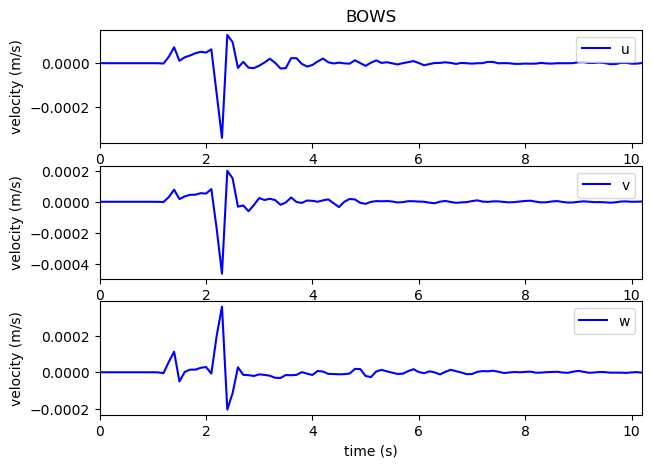

In [91]:
#site_num_file = stafolder + './sitemesh_number.txt')
# plot waveform

# xdmffolder = '/Volumes/AvalonPark/output/'
# modelname = 'test3Dv2-2hz'



nsite = 30

nstep = 252
dt = 0.2 # data sample rate

tt = np.linspace(0,nstep*dt-dt,nstep)


for k in range(1):
    
    fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(7,5))
    
    wfname = stafolder + modelname + '/sta'+ str(k)+ '.txt'
    wf = np.loadtxt(wfname)
    ax[0].plot(tt,wf[:,0],'-b',label='u')
    ax[0].legend()
    ax[0].set_title(siteTable.sta[k])
    ax[0].set_ylabel('velocity (m/s)')
    ax[0].set(xlim=(0,10.2))

    ax[1].plot(tt,wf[:,1],'-b',label='v')
    ax[1].legend()
    ax[1].set_ylabel('velocity (m/s)')
    ax[1].set(xlim=(0,10.2))

    ax[2].plot(tt,wf[:,2],'-b',label='w')
    ax[2].legend()
    ax[2].set_xlabel('time (s)')
    ax[2].set_ylabel('velocity (m/s)')
    ax[2].set(xlim=(0,10.2))
    
    plt.savefig('waveform'+str(k)+'.png',dpi=150)
    
    

10020.0


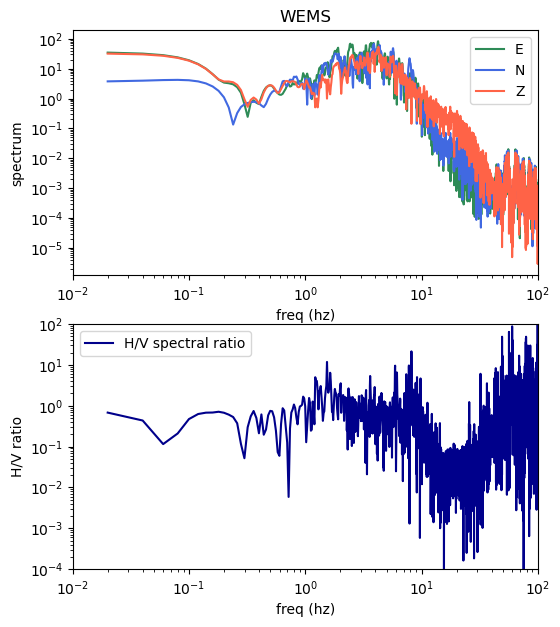

In [178]:
## plot spectrium for each station

xdmffolder = '/Volumes/AvalonPark/test3dv4_5hz/'
modelname = 'test3Dv4-5hz'


nsite = 30
duration = 50.1
SAMPLE_RATE = 1/0.005 # data sample rate

N = duration * SAMPLE_RATE

Nt = int(np.round(N/2,1)-1)
print(N)

from scipy.fft import fft, fftfreq


# filename = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/test3Dv4-5hz/test3Dv4-5hz-receiver-00001-00009.dat'
# nsta = 0 

# filename = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/test3Dv4-5hz/test3Dv4-5hz-receiver-00020-00009.dat'
# nsta = 19


filename = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/test3Dv4-5hz/test3Dv4-5hz-receiver-00020-00009.dat'
nsta = 25

t, vx, vy, vz = np.loadtxt(filename, comments='#', skiprows=2, usecols=(0,7,8,9),unpack=True)
yf1 = fft(vx)
yf2 = fft(vy)
yf3 = fft(vz)
xf = fftfreq(int(N),1/SAMPLE_RATE)

fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(6,7))
    
ax[0].plot((xf[1:Nt]), np.abs(yf1)[1:Nt],'-',color='seagreen',label='E')
ax[0].plot((xf[1:Nt]), np.abs(yf2)[1:Nt],'-',color='royalblue',label='N')
ax[0].plot((xf[1:Nt]), np.abs(yf3)[1:Nt],'-',color='tomato',label='Z')
ax[0].set(xlim=(0.01,100))
ax[0].set_xscale('log',base=10)
ax[0].set_yscale('log',base=10)
ax[0].set_title(siteTable.sta[nsta])
    
# plt.xlim(0,5)
ax[0].set_ylabel('spectrum')
ax[0].set_xlabel('freq (hz)')

ax[0].legend()

ax[1].plot((xf[1:Nt]), np.sqrt(yf1[1:Nt]**2 + yf2[1:Nt]**2)/np.sqrt(2)/np.abs(yf3)[1:Nt] ,'-',color='darkblue',label='H/V spectral ratio')

ax[1].set(xlim=(0.01,100),ylim=(1e-4,100))
ax[1].set_ylabel('H/V ratio')
ax[1].set_xlabel('freq (hz)')
ax[1].set_xscale('log',base=10)
ax[1].set_yscale('log',base=10)

ax[1].legend()

fftname = './FFT-'+ siteTable.sta[nsta]+ '.png'
plt.savefig(fftname,dpi=150)

# for k in [1,2,3,5,6]:
#     # Number of samples in normalized_tone
#     wfname = stafolder + modelname + '/'+ str(k)+ '.txt'
#     wf = np.loadtxt(wfname)
    
#     yf1 = fft(wf[:,0])
#     yf2 = fft(wf[:,1])
#     yf3 = fft(wf[:,2])
    
#     xf = fftfreq(N, 1 / SAMPLE_RATE)
    
#     plt.figure(figsize=(6,3))
    
#     plt.plot(xf[:Nt], np.abs(yf1)[:Nt],'-',color='seagreen',label='E')
#     plt.plot(xf[:Nt], np.abs(yf2)[:Nt],'-',color='royalblue',label='N')
#     plt.plot(xf[:Nt], np.abs(yf3)[:Nt],'-',color='tomato',label='Z')
#     # plt.xlim(0,5)
#     plt.ylabel('spectrum')
    
#     plt.legend()
#     fftname = stafolder + modelname + '/FFT-'+ siteTable.sta[k]+ '.png'
#     plt.savefig(fftname,dpi=150)

In [13]:
# import instaseis and dependency
import numpy as np

from obspy import read
# from obspy.taup import TauPyModel as taup
# from obspy.taup.taup_geo import calc_dist_azi as calc_dist_azi

from obspy.clients.fdsn import Client
# from obspy.signal.cross_correlation import correlate
# from obspy.signal.cross_correlation import xcorr_max


# plot regional seismic network and compare seismograph
from obspy.clients.fdsn import Client
# from obspy.geodetics import gps2dist_azimuth
from obspy import UTCDateTime
# from obspy.signal.rotate import rotate2zne
from obspy.core.stream import Stream
from obspy import read,read_inventory
# from obspy.signal.cross_correlation import xcorr
# from obspy.signal.rotate import rotate_ne_rt
from obspy import Trace

In [2]:
import pandas as pd

siteTable = pd.read_csv('/Users/duoli/Library/Mobile Documents/com~apple~CloudDocs/NSHM/Model_kinematic/site_subtable.csv')
print(siteTable.sta.shape)

(30,)


In [17]:
client  = Client("GEONET")

nw = ['NZ']       # network
sta= siteTable.sta # station
ch = ['E*','BH*','HN*']      # channel

# Event catalog
# event = cat[0]
# print(cat) 

startT = '2023-01-01 11:05:00.000'
endT = '2024-01-01 11:00:00.000'
cat = client.get_events(latitude=siteTable.lat[0],longitude=siteTable.lon[0],maxradius=0.5,minmagnitude=4.0, starttime=startT,endtime=endT) # Y
print(cat)

# cat.plot(projection="local")

2 Event(s) in Catalog:
2023-03-11T10:08:18.445589Z | -41.272, +174.473 | 4.37 MLv | manual
2023-07-30T10:41:09.333238Z | -40.990, +174.902 | 4.61 MLv | manual


In [23]:
event = cat[0]
start = event.origins[0].time
end = start + 50

waveform = Stream()


inv = client.get_stations(network='NZ',channel='H??',latitude=siteTable.lat[0],longitude=siteTable.lon[0],maxradius=0.5,starttime=start,endtime=end,level="response")
print(inv)

st = client.get_waveforms(network='NZ',station='BOWS',channel='H??',starttime=start,endtime=end)
st.remove_response(inventory=inv,output='acc') 
st.detrend('simple')
waveform += st
#     print("Station %f: DONE " %(str(sta[num])))
print(waveform)

Inventory created at 2024-01-31T02:23:27.000000Z
	Created by: Delta
		    
	Sending institution: GeoNet (WEL(GNS_Test))
	Contains:
		Networks (1):
			NZ
		Stations (60):
			NZ.ARKS (Wainuiomata Arakura School)
			NZ.AVAB (GNS Avalon)
			NZ.BMTS (Belmont)
			NZ.BOWS (Bowen St Turnbull House Wellington)
			NZ.DAVS (Collett Street)
			NZ.EBFS (Eastbourne Fire Station)
			NZ.FKPS (Wellington Frank Kitts Park)
			NZ.FTPS (Featherston Primary School)
			NZ.HIBS (Hutt International Boys School)
			NZ.HSSS (Lower Hutt Haywards Substation)
			NZ.INSS (Lower Hutt GNS Nuclear Sciences)
			NZ.KIRS (Kaitoke Kiwi Ranch)
			NZ.LHBS (Lower Hutt Normandale)
			NZ.LHES (Lower Hutt Emergency Management Office)
			NZ.LHRS (Lower Hutt Normandale Rock Site)
			NZ.LIRS (Lower Hutt IRL)
			NZ.LRSS (Randwick School)
			NZ.MISS (Wellington Miramar School)
			NZ.MJCB (Wellington Majestic Centre)
			NZ.MKBS (Makara Bunker)
			NZ.MKVS (Makara Village)
			NZ.NBSS (St Bernadette's School)
			NZ.NEWS (Newlands)
			NZ

TypeError: get_waveforms() missing 1 required positional argument: 'location'

In [15]:
sta= siteTable.sta # station

print(sta)

0     BOWS
1     CUBS
2     EBPS
3     FKPS
4     LHRS
5     LHUS
6     MISS
7     MKVS
8     NEWS
9     PGMS
10    PIPS
11    POTS
12    PTOS
13    PVCS
14    RQGS
15    SEAS
16    SEVS
17    SNZO
18    SOMS
19    TEPS
20    TFSS
21    TRTS
22    VUWS
23    WCFS
24     WEL
25    WEMS
26    WNAS
27    WNHS
28    WNKS
29    WTYS
Name: sta, dtype: object
